In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
airbnb = pd.read_csv('Airbnb_data.csv')

In [5]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb.shape

(48895, 16)

In [8]:
airbnb.select_dtypes(include='number')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


In [9]:
airbnb.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [10]:
airbnb.drop(['id','name','host_name','last_review'] , axis =1 ,inplace = True)

In [11]:
airbnb.head(4)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [12]:

airbnb.fillna({'reviews_per_month': 0} , inplace = True)

In [13]:
airbnb.isna().sum()

,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0


In [14]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
airbnb=airbnb.loc[airbnb['price'] > 0]

In [16]:
airbnb['price'].min()

10

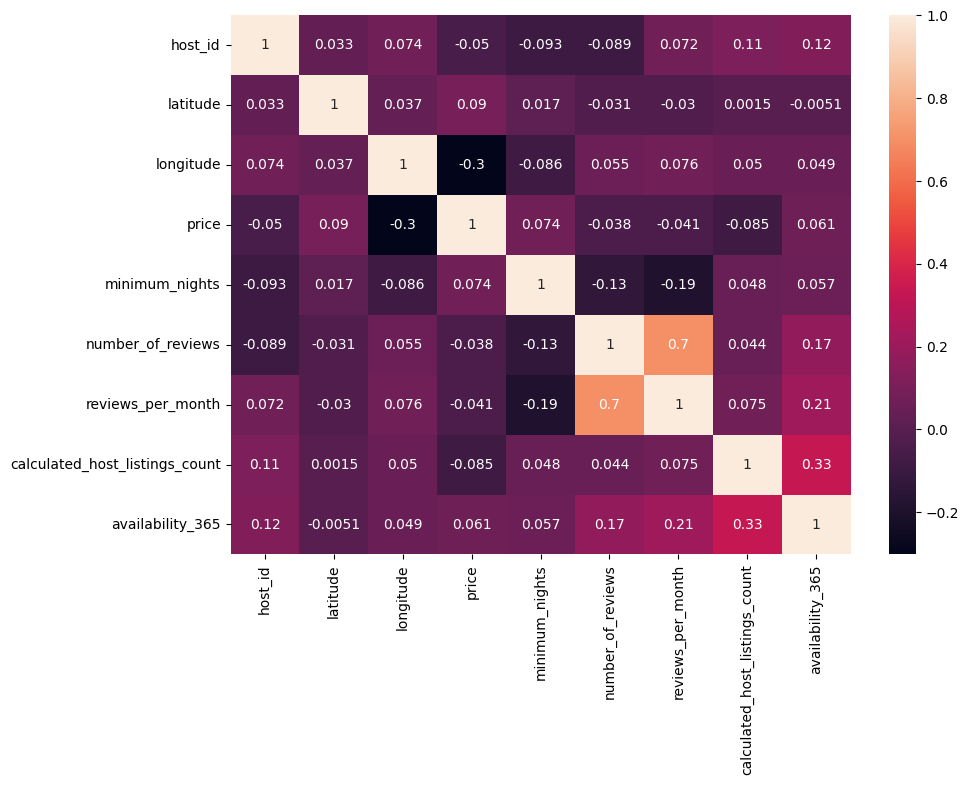

In [18]:
# Get only numeric columns for correlation
numeric_cols = airbnb.select_dtypes(include=[np.number]).columns
corr = airbnb[numeric_cols].corr(method='kendall')

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()


In [19]:
airbnb.shape

(48884, 12)

In [21]:
# Select only numeric columns for correlation
numeric_data = airbnb.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Display the correlation matrix
print(corr)

                                 host_id  latitude  longitude     price  \
host_id                         1.000000  0.020199   0.127022  0.015294   
latitude                        0.020199  1.000000   0.084830  0.033899   
longitude                       0.127022  0.084830   1.000000 -0.149954   
price                           0.015294  0.033899  -0.149954  1.000000   
minimum_nights                 -0.017391  0.024893  -0.062772  0.042805   
number_of_reviews              -0.140181 -0.015357   0.059015 -0.047926   
reviews_per_month               0.209752 -0.018719   0.138435 -0.050531   
calculated_host_listings_count  0.154949  0.019518  -0.114715  0.057462   
availability_365                0.203434 -0.010942   0.082669  0.081847   

                                minimum_nights  number_of_reviews  \
host_id                              -0.017391          -0.140181   
latitude                              0.024893          -0.015357   
longitude                            -0.06

In [22]:
airbnb.nlargest(10, 'number_of_reviews')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [24]:
# First, select only numeric columns, then calculate correlation
numeric_cols = airbnb.select_dtypes(include=['number'])
corr = numeric_cols.corr(method='kendall')

In [25]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

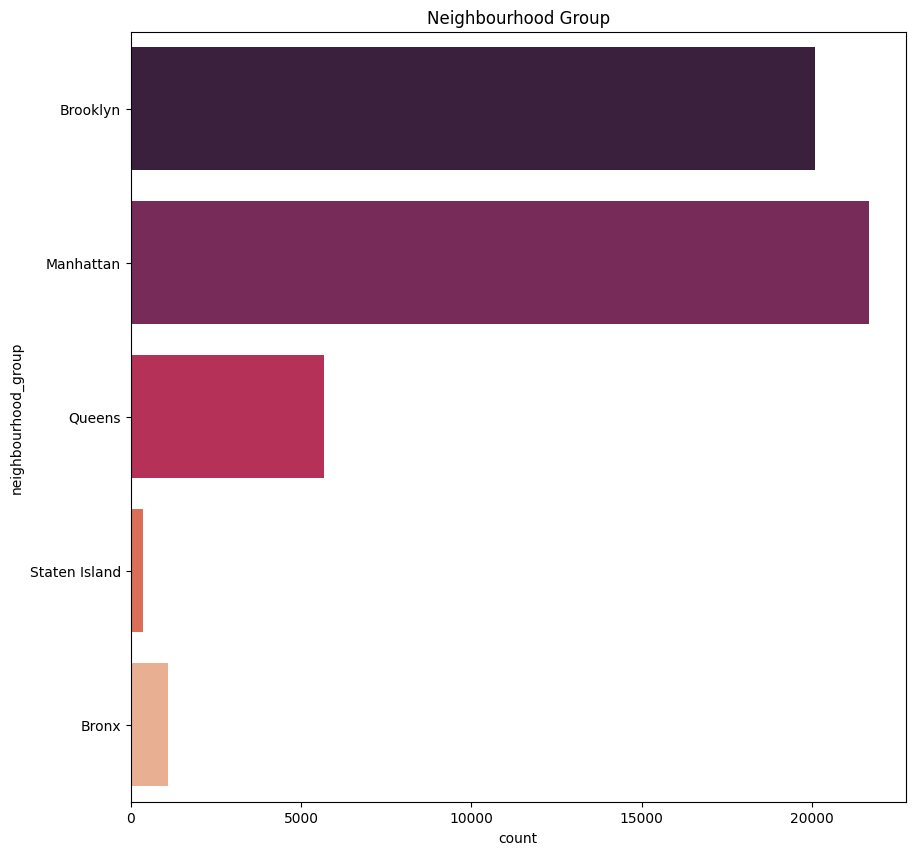

In [26]:
sns.countplot(airbnb['neighbourhood_group'], palette="rocket")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

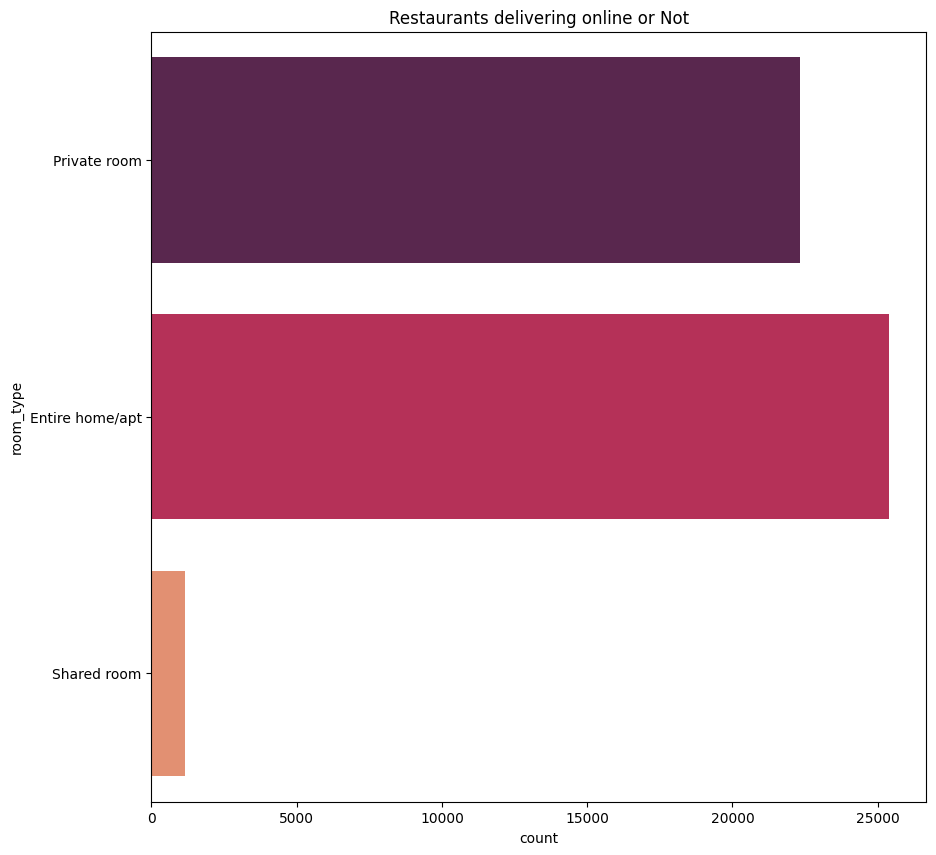

In [27]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="rocket")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

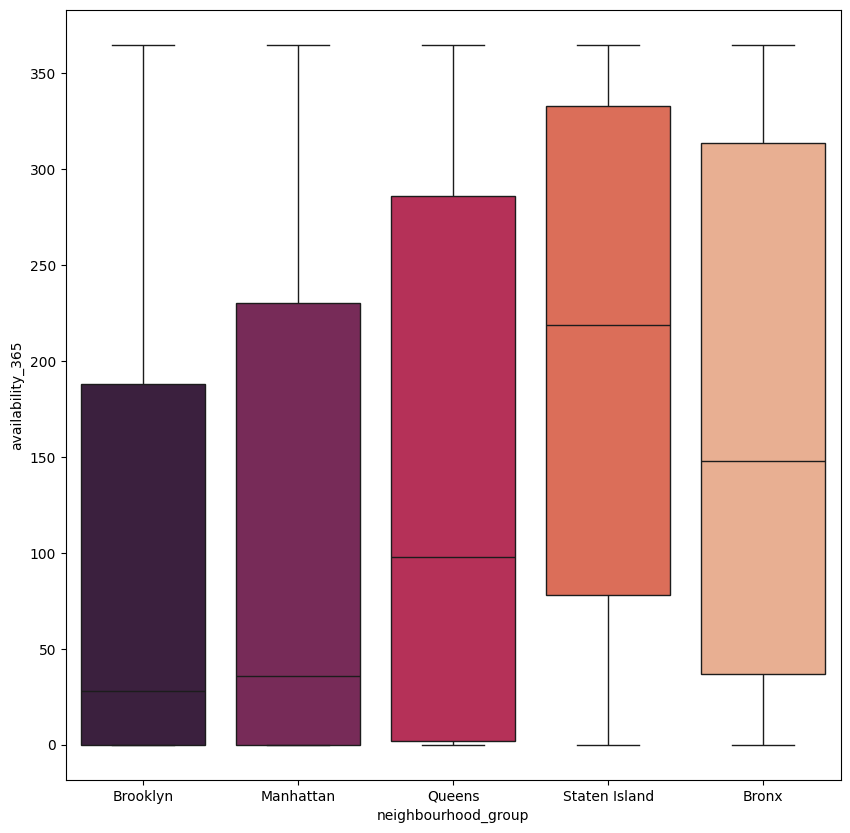

In [28]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='rocket')

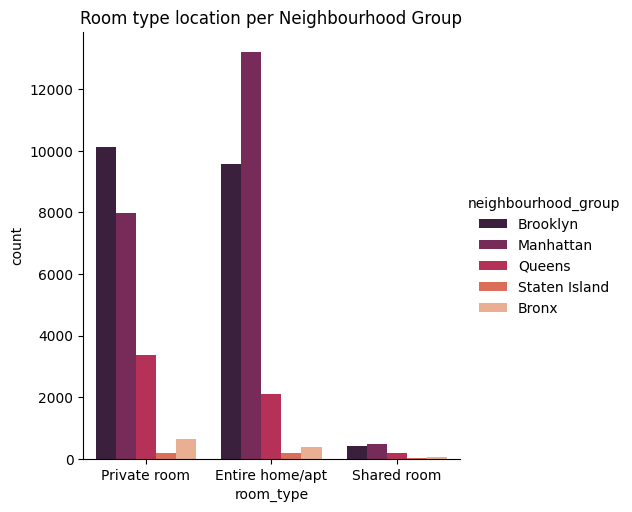

In [29]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=airbnb,palette = 'rocket');
plt.title(title)
plt.ioff()

In [30]:

title = 'Median Price per Neighbourhood Group'
result = airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')



In [31]:
result

,neighbourhood_group,price
0,Bronx,65.0
3,Queens,75.0
4,Staten Island,75.0
1,Brooklyn,90.0
2,Manhattan,150.0


In [32]:
sns.barplot(x='neighbourhood_group', y="price", data=airbnb, order=result['neighbourhood_group'],palette='rocket')
plt.title(title)
plt.ioff()

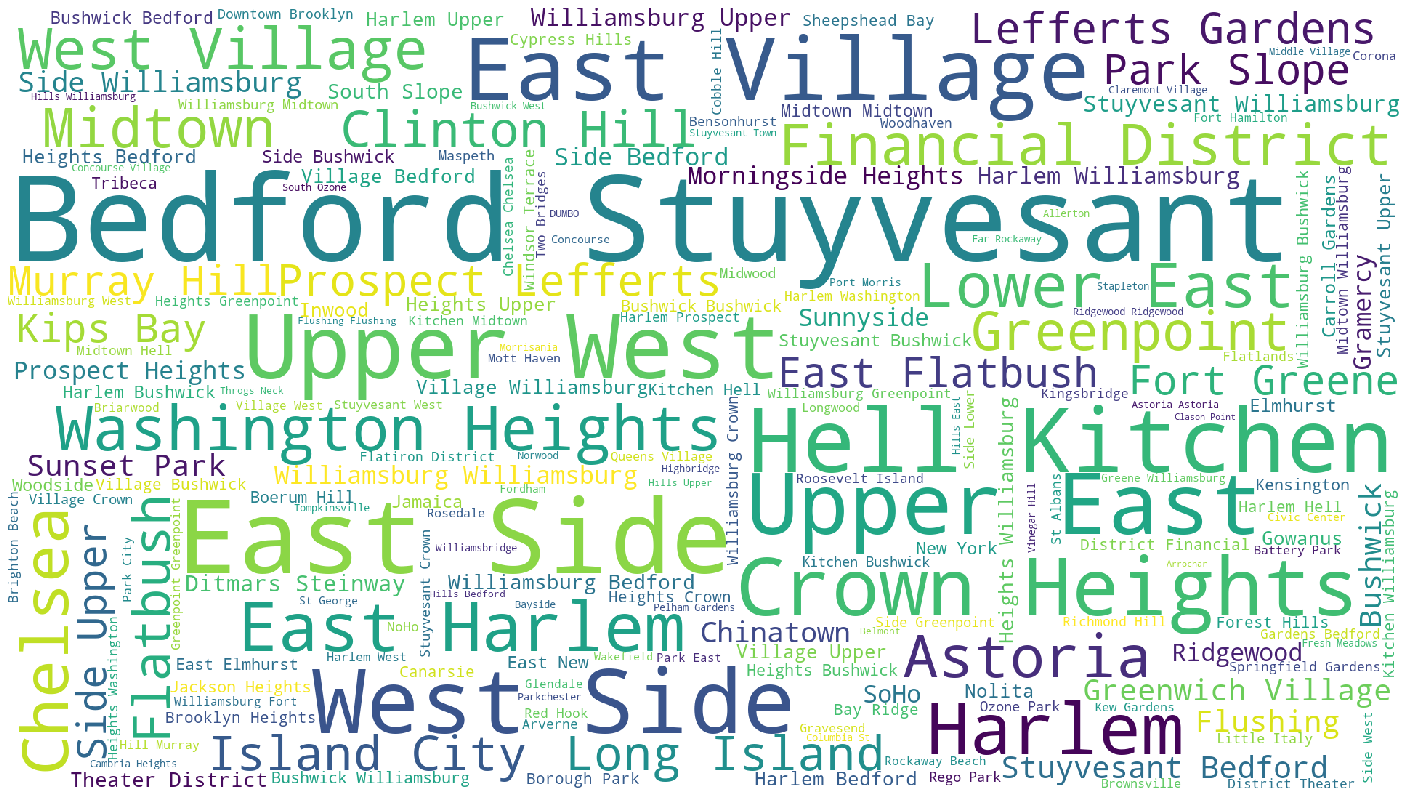

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [33]:
airbnb.drop(['host_id','latitude','longitude','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

In [34]:
airbnb.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,1,0


In [35]:
airbnb = pd.get_dummies(airbnb, columns=['room_type','neighbourhood','neighbourhood_group'], drop_first=True)


In [36]:
airbnb.head()

,price,minimum_nights,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,149,1,6,365,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,225,1,2,355,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,150,3,1,365,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,89,1,1,194,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,80,10,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
#Defining the independent variables and dependent variables
X = airbnb.drop(['price'],axis=1)
y = airbnb['price']


In [38]:
#Getting Test and Training Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=24)


In [39]:

X_train.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
16861,2,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
26143,3,1,205,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8711,30,1,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4443,7,1,31,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2873,6,1,71,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.mean(y))
print('Price std:', np.std(y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))))
print('R2 score train:', r2_score(y_train, reg.predict(X_train), multioutput='variance_weighted'))
print('R2 score test:', r2_score(y_test, reg.predict(X_test), multioutput='variance_weighted'))

Price mean: 152.75505277800508
Price std: 240.16780356407335
RMSE: 224.51095272066732
R2 score train: 0.11355885721084091
R2 score test: 0.11308367643638328


In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 152.76
Price std: 240.17
RMSE: 217.14
R2 score train: 0.35
R2 score test: 0.17


In [47]:
import pickle
Pkl_Filename = "Airbnb_price_prediction.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(rfr, file)